# Project 3 - HR Employee Attrition 


# By Nnamdi Nwankwo

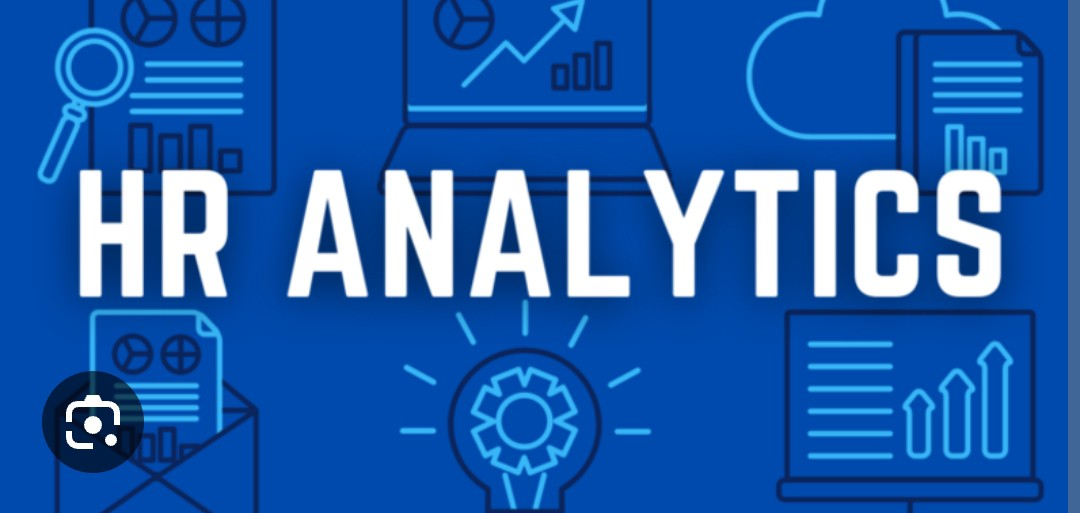

# Objective
To analyze Human Resource Employee attrition and gain insights on the factors responsible for attrition in the Organization Using the Features provided in the dataset. 
Procedures includes Data Cleaning, Visualizations and Recommended Strategies for HR attrition based on the Findings



# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#dealing with warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\CELEBOBO COMPUTERS\Downloads\New folder\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the data

In [2]:
HR_Data = pd.read_csv(r"C:\Users\CELEBOBO COMPUTERS\Downloads\Datasets\Nnamdi Datasc Projects\HR-Employee-Attrition.csv")
HR_Data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
HR_Data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [4]:
#making a copy of the dataset
HR_Data2 = HR_Data.copy()

#Size of dataset
HR_Data2.shape

(1470, 35)

# Data Validation 

In [5]:
HR_Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
HR_Data2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Cleaning

In [7]:
HR_Data2.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
HR_Data2.duplicated().sum()

0

In [9]:
#Getting the unique values of the Object Columns
for x in HR_Data2.columns:
    if HR_Data2[x].dtype=='object':
        print()
        print(x)
        print(HR_Data2[x].unique())


Attrition
['Yes' 'No']

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department
['Sales' 'Research & Development' 'Human Resources']

EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender
['Female' 'Male']

JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus
['Single' 'Married' 'Divorced']

Over18
['Y']

OverTime
['Yes' 'No']


In [10]:
#Deleting redundant columns
HR_Data2 = HR_Data2.drop(["EmployeeCount", "Over18", "StandardHours"], axis=1)

In [11]:
HR_Data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


# Data Visualizations

In [12]:
#showing the correlation in the numerical Variables
HR_Data2.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


<AxesSubplot:>

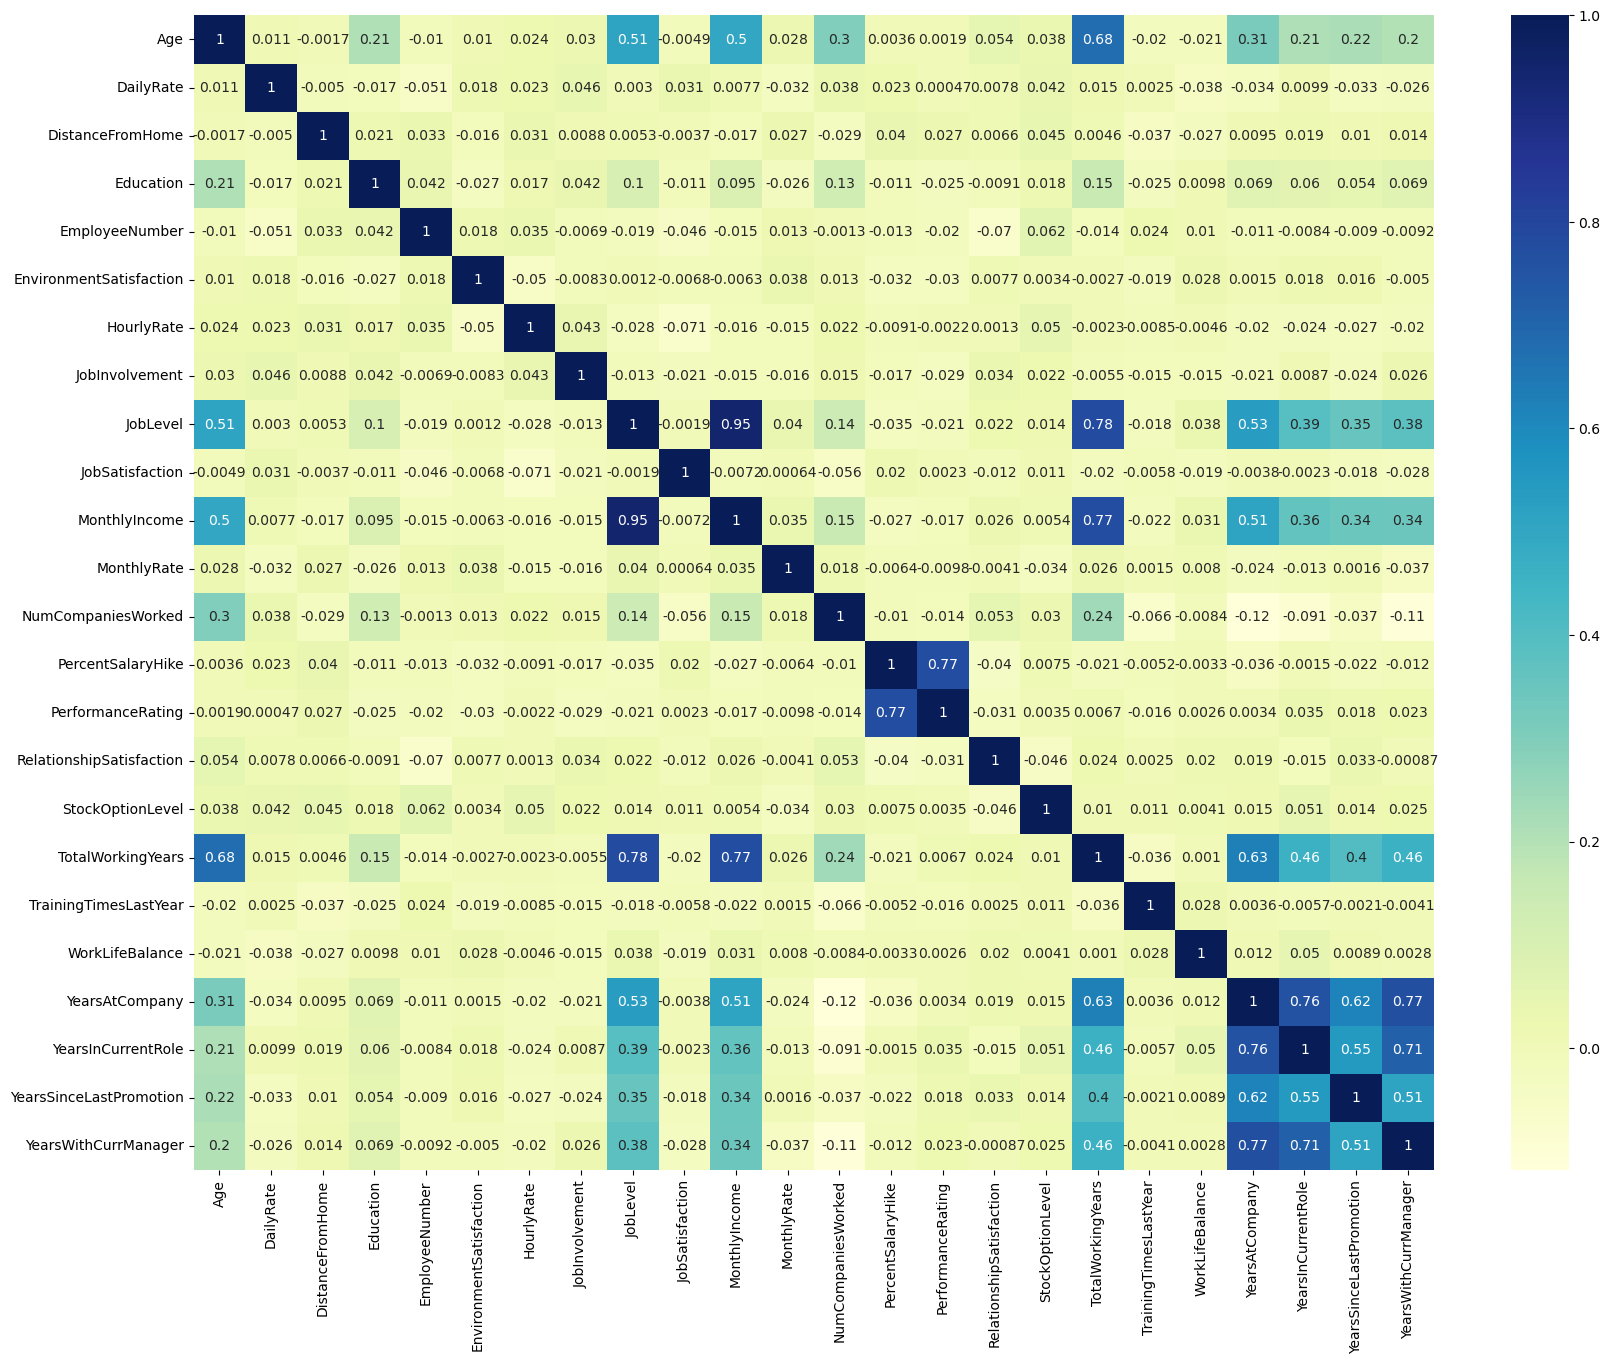

In [13]:
plt.figure(figsize=(20, 15))
sns.heatmap(HR_Data2.corr(), annot=True, cmap='YlGnBu')

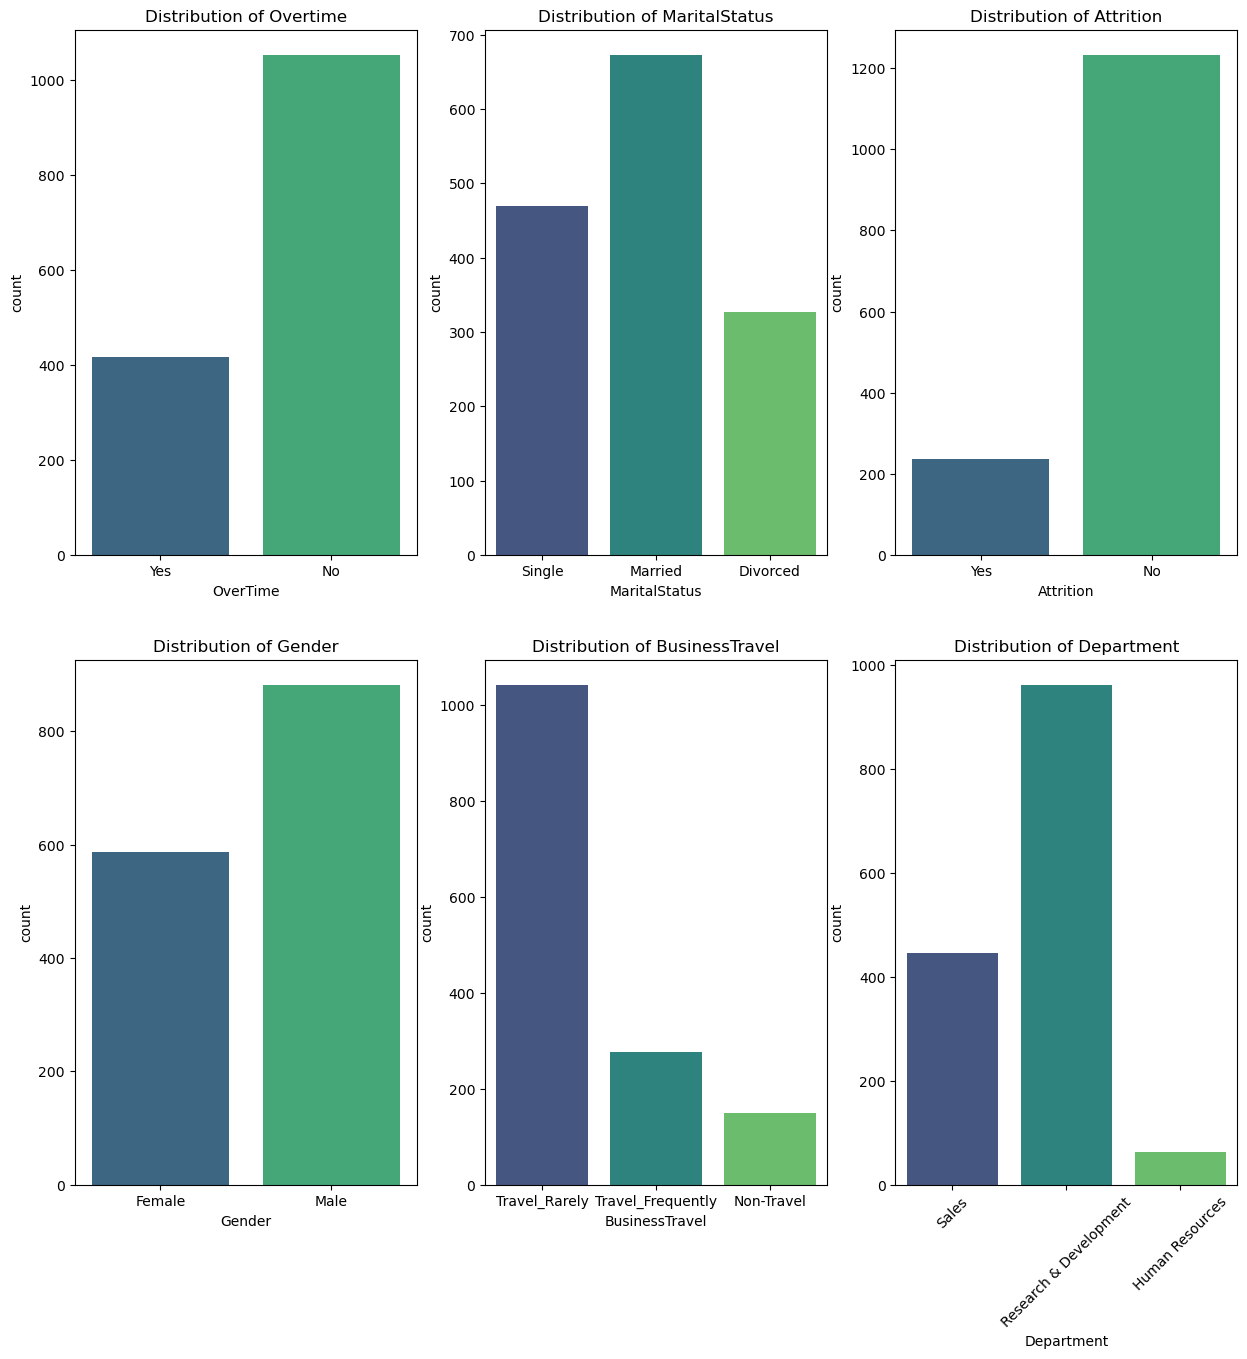

In [29]:
#Distribution of Features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

ax = sns.countplot(x='OverTime', palette='viridis', data=HR_Data2, ax=axs[0][0])

ax = sns.countplot(x="MaritalStatus",  palette='viridis', data=HR_Data2, ax=axs[0][1])

ax = sns.countplot(x="Attrition", palette='viridis', data=HR_Data2, ax=axs[0][2])

ax = sns.countplot(x="Gender",  palette='viridis', data=HR_Data2, ax=axs[1][0])

ax = sns.countplot(x="BusinessTravel",  palette='viridis', data=HR_Data2, ax=axs[1][1])

ax = sns.countplot(x="Department",  palette='viridis', data=HR_Data2, ax=axs[1][2])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

axs[0][0].set_title("Distribution of Overtime")
axs[0][1].set_title("Distribution of MaritalStatus")
axs[0][2].set_title("Distribution of Attrition")
axs[1][0].set_title("Distribution of Gender")
axs[1][1].set_title("Distribution of BusinessTravel")
axs[1][2].set_title("Distribution of Department")

plt.show()

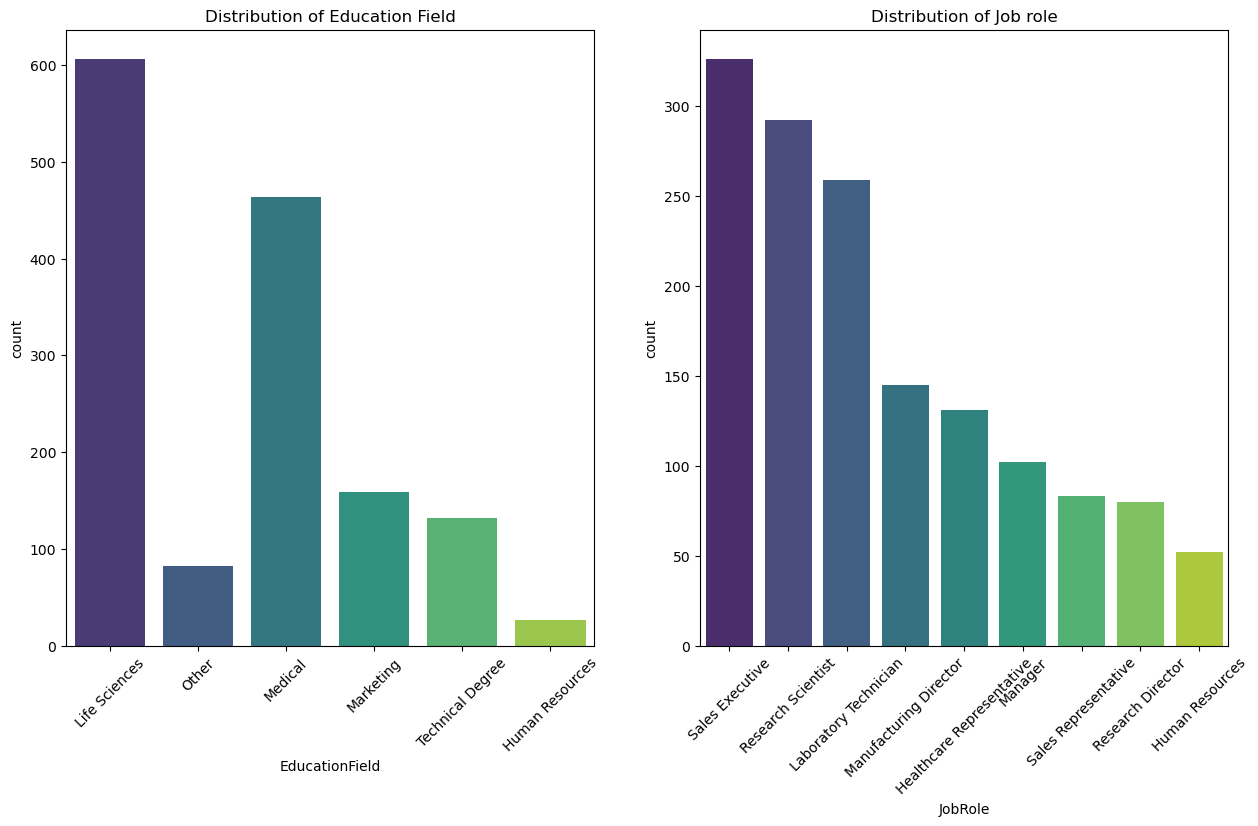

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15, 8))

ax = sns.countplot(x="EducationField", palette='viridis', ax=ax1, data=HR_Data2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax = sns.countplot(x="JobRole", data=HR_Data2, palette='viridis', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax1.set_title("Distribution of Education Field")
ax2.set_title("Distribution of Job role")



plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

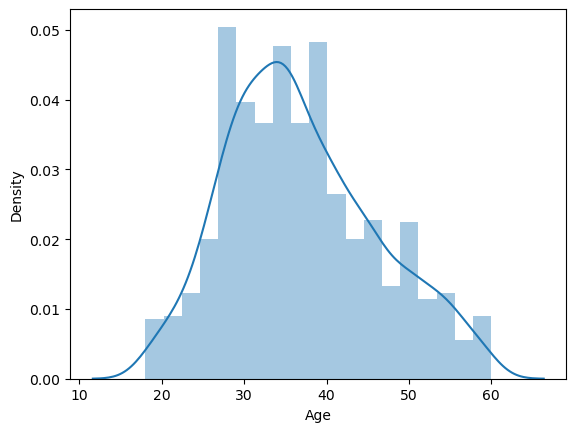

In [33]:
#Age distribution
sns.distplot(HR_Data2["Age"])

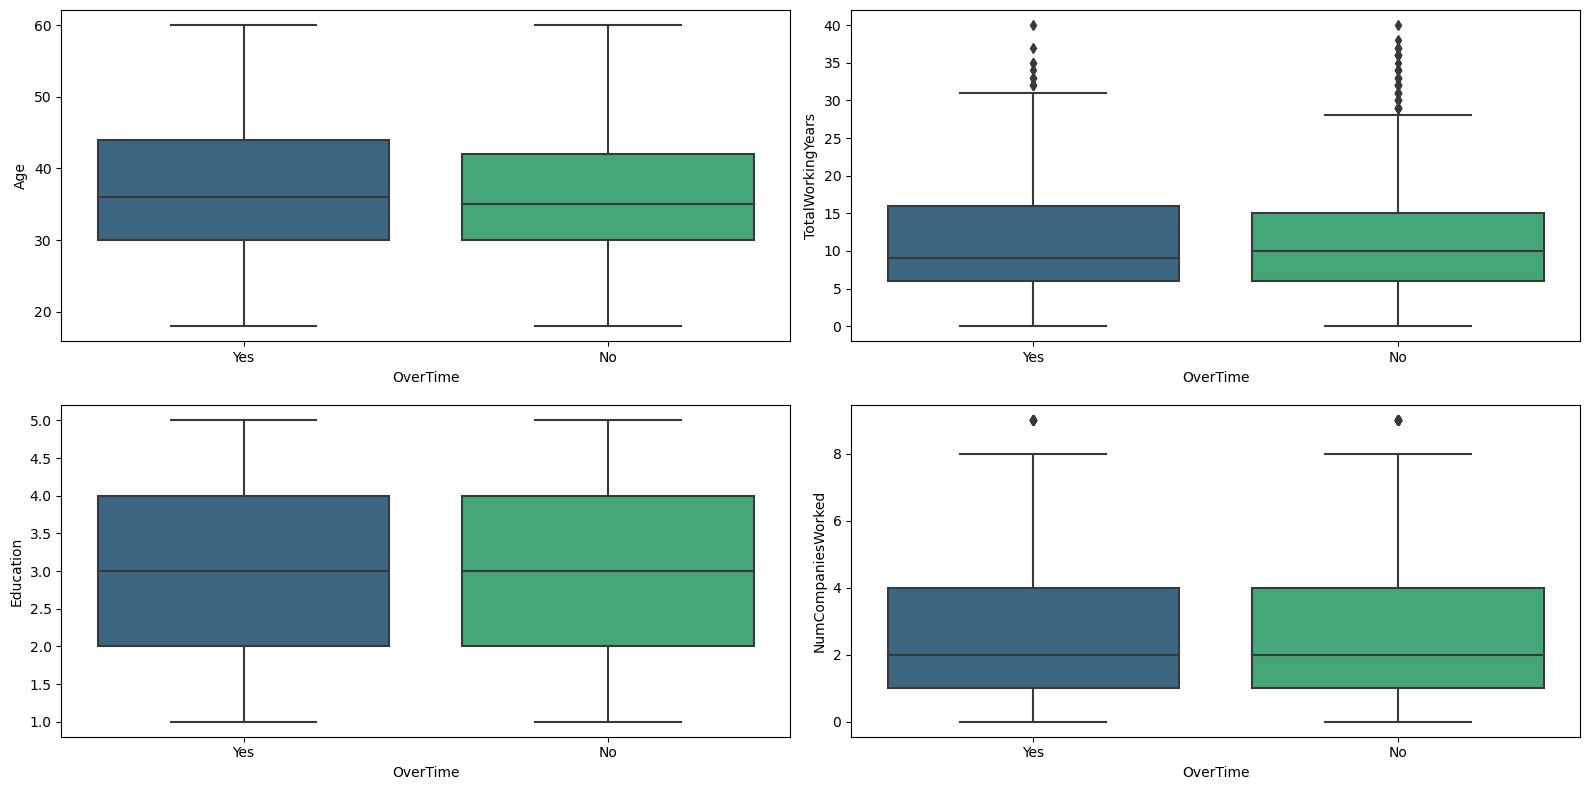

In [17]:
#Relationship with Overtime and Some features

D_features = ['Age', 'TotalWorkingYears', 'Education', 'NumCompaniesWorked']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))


for p, column in enumerate(D_features):
    sns.boxplot(x='OverTime', y=column, palette='viridis', data=HR_Data2, ax=axes[p//2][p%2])
    
fig.tight_layout(w_pad=1, h_pad=1.5)
plt.show()

<AxesSubplot:xlabel='OverTime', ylabel='DistanceFromHome'>

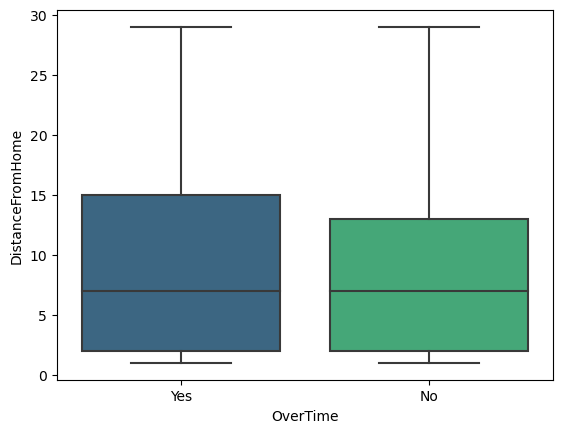

In [18]:
sns.boxplot(x='OverTime', y='DistanceFromHome', palette='viridis', data=HR_Data)

# Attrition Analysis

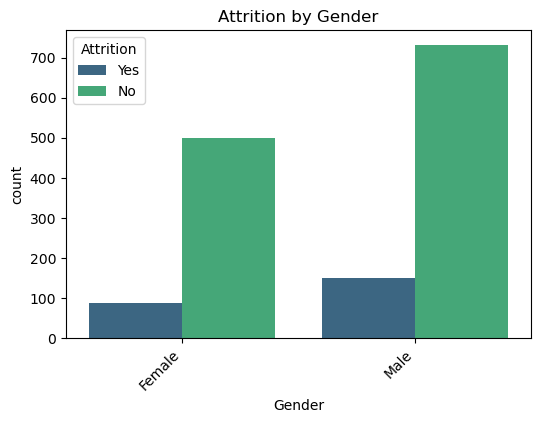

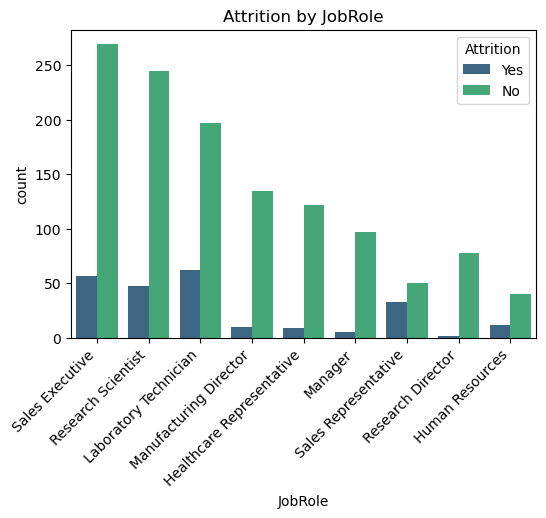

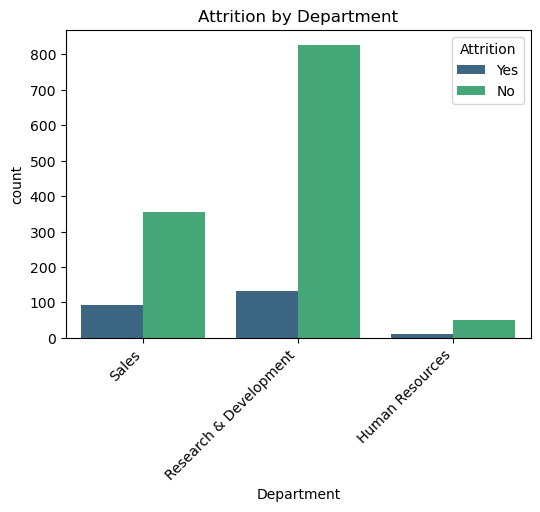

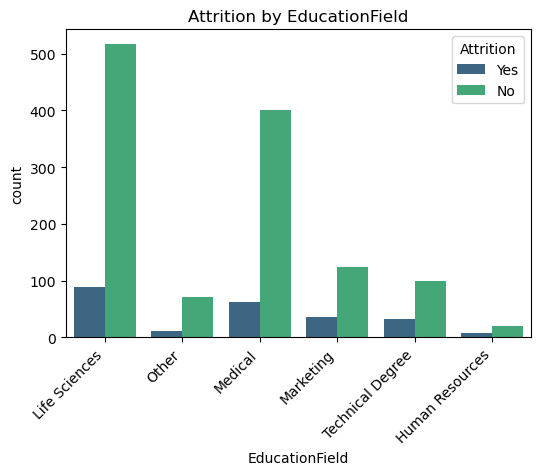

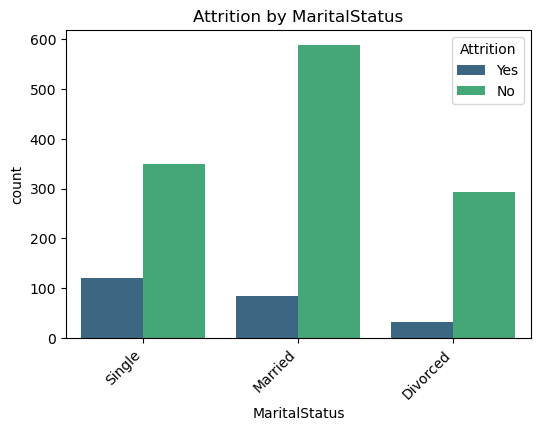

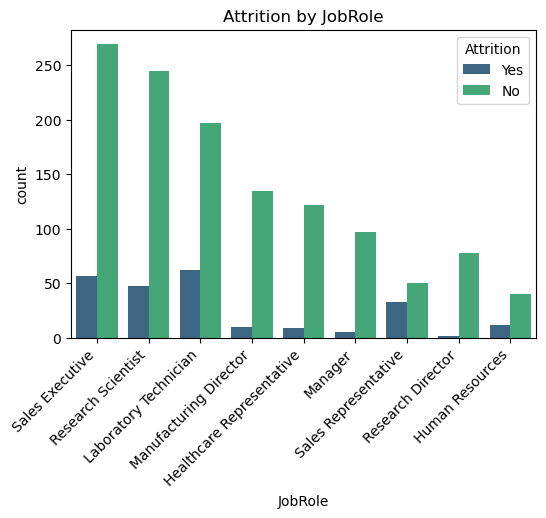

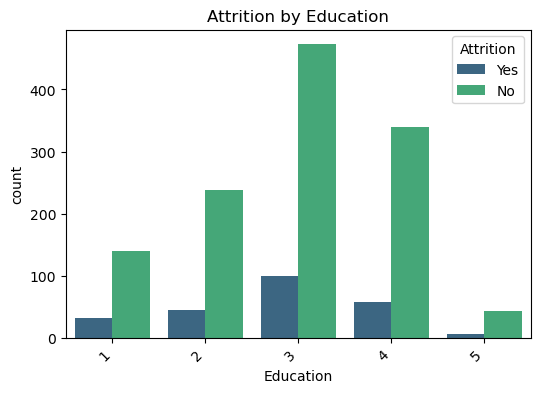

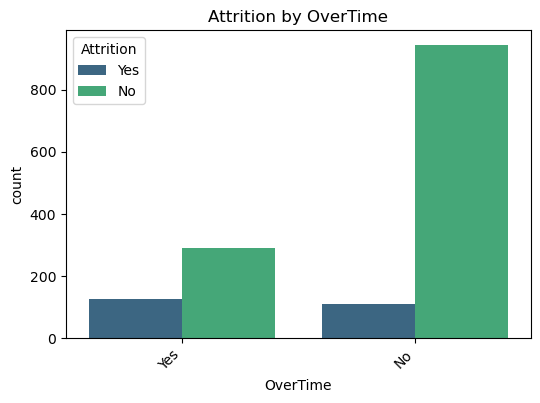

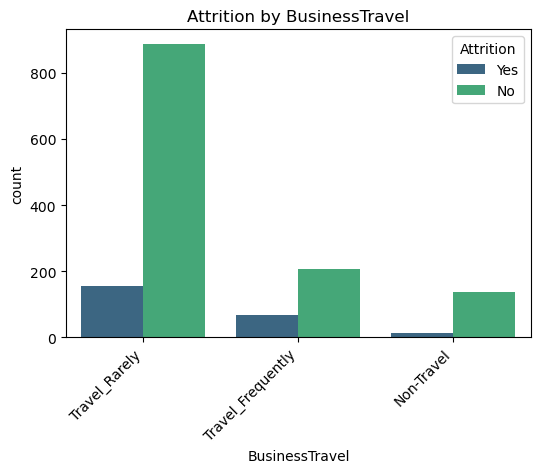

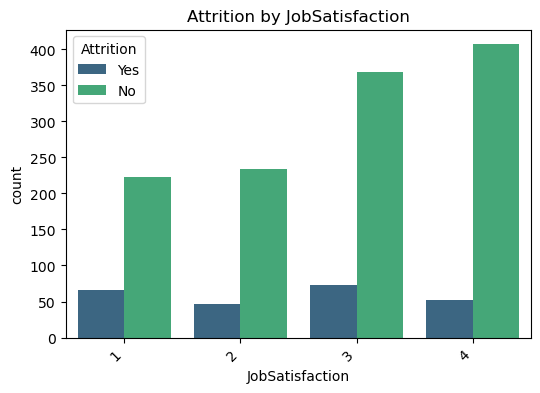

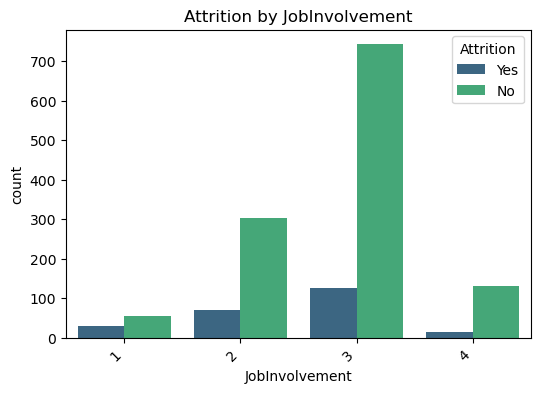

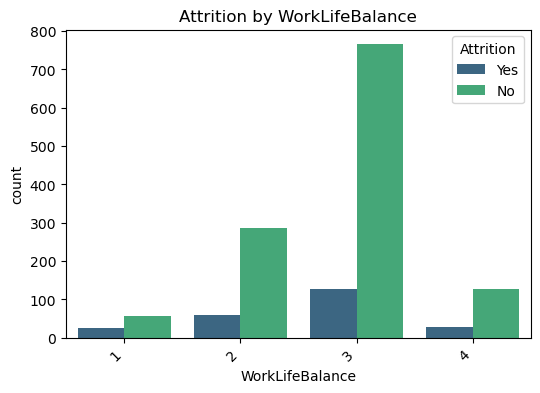

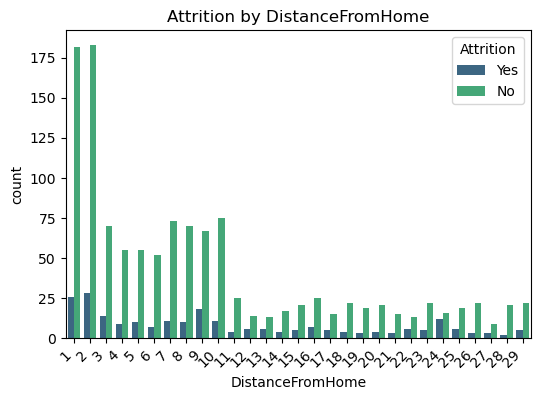

In [19]:
Cat_Colms = ["Gender", "JobRole", "Department", "EducationField", "MaritalStatus", "JobRole", "Education", "OverTime", "BusinessTravel", "JobSatisfaction", "JobInvolvement", "WorkLifeBalance", "DistanceFromHome"]
for p in Cat_Colms:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=HR_Data2, x=p, hue="Attrition", palette='viridis')
    plt.title(f"Attrition by {p}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

Text(0.5, 1.0, 'Attrition by Age')

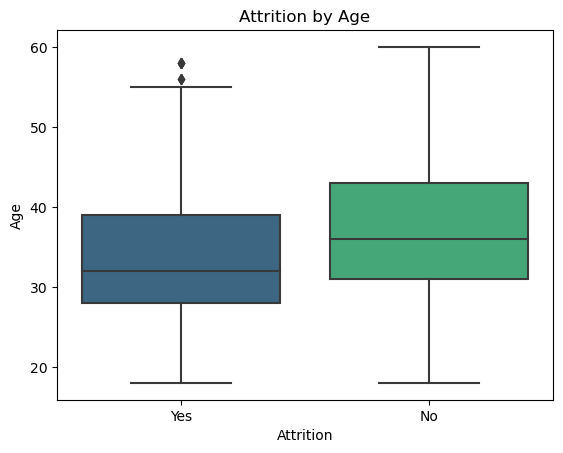

In [20]:
sns.boxplot(data=HR_Data2, y='Age', x="Attrition", palette='viridis')
plt.title('Attrition by Age')

Text(0.5, 1.0, 'Attrition by Total Working Years')

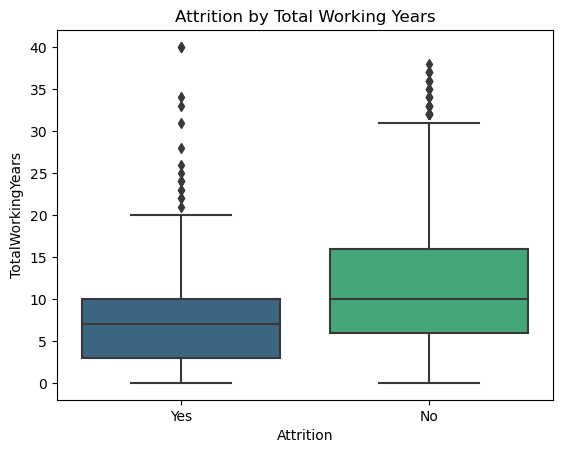

In [21]:
sns.boxplot(data=HR_Data2, y='TotalWorkingYears', x="Attrition", palette='viridis')
plt.title('Attrition by Total Working Years')

Text(0.5, 1.0, 'Attrition by Income/Salary')

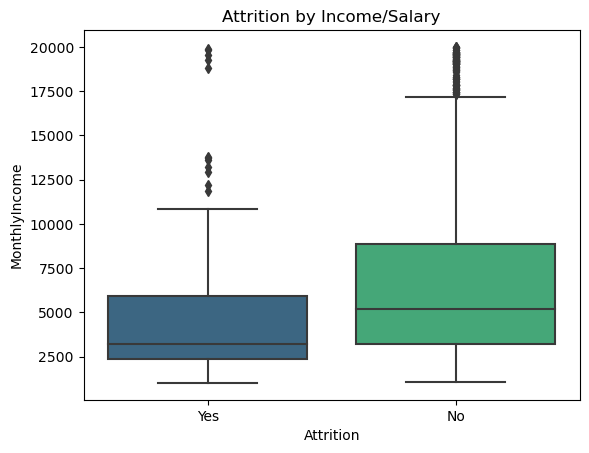

In [39]:
#Attrition by Income

sns.boxplot(data=HR_Data2, y='MonthlyIncome', x="Attrition", palette='viridis')
plt.title('Attrition by Income/Salary')

In [23]:
#Job Satisfaction Rating
value_counts = HR_Data2.groupby('JobRole')['JobSatisfaction'].value_counts()

value_counts.unstack()

df = value_counts.unstack()
df.loc['Total', :] = df.sum(axis=0)
df.loc[:, 'Total'] = df.sum(axis=1)
df

JobSatisfaction,1,2,3,4,Total
JobRole,,,,,
Healthcare Representative,26.0,19.0,43.0,43.0,131.0
Human Resources,10.0,16.0,13.0,13.0,52.0
Laboratory Technician,56.0,48.0,75.0,80.0,259.0
Manager,21.0,21.0,27.0,33.0,102.0
Manufacturing Director,26.0,32.0,49.0,38.0,145.0
Research Director,15.0,16.0,27.0,22.0,80.0
Research Scientist,54.0,53.0,90.0,95.0,292.0
Sales Executive,69.0,54.0,91.0,112.0,326.0
Sales Representative,12.0,21.0,27.0,23.0,83.0


Text(0.5, 1.0, 'Career growth')

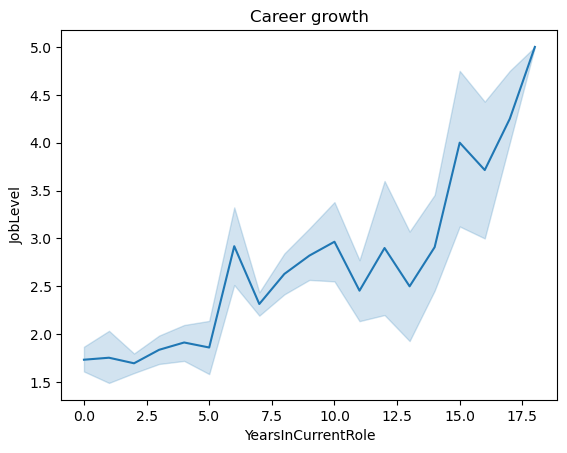

In [38]:
#Career growth
sns.lineplot(data=HR_Data2, y='JobLevel', x="YearsInCurrentRole")
plt.title('Career growth')



# Recommendations

. Thorough review on the effect of Overtime on Attrition and developing strategies for managing workload

. Improvement in the area of work balance will help decrease the rate of attrition among the employees

. Increment in the salaries of hardworking and well deserved employees will help reduce attrition

. Conducting exit Interviews with the employees leaving the company so as to understand the reasons for leaving

. Supporting employees professional development like promotions and Learning new skills will help improve job satisfaction

# Summary

It is necessary for the Company to give attention to the reasons for the employees attrition based on the findings to reduce employee attrition as well as enhancing job satisfaction